In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import  pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
sns.set(style='whitegrid')
import io
from google.colab import files
uploaded = files.upload()


Saving heart_disease_dataset.csv to heart_disease_dataset.csv


Data Loading


In [9]:
df = pd.read_csv(io.BytesIO(uploaded['heart_disease_dataset.csv']))
print('Dataset shape:', df.shape)
print('Dataset preview:')
display(df.head())
df.info()

Dataset shape: (1000, 16)
Dataset preview:


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

Data cleaning and preprocessing


In [10]:
missing_values = df.isnull().sum()
print('Missing values per column:')
print(missing_values)

df = df.dropna()

print('Data types:')
print(df.dtypes)

Missing values per column:
Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64
Data types:
Age                         int64
Gender                     object
Cholesterol                 int64
Blood Pressure              int64
Heart Rate                  int64
Smoking                    object
Alcohol Intake             object
Exercise Hours              int64
Family History             object
Diabetes                   object
Obesity                    object
Stress Level                int64
Blood Sugar                 int64
Exercise I

Exploratory Data Analysis

Summary statistics for numeric columns:


,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,52.428788,250.168182,135.559091,79.445455,4.445455,5.604545,135.493939,0.396970
std,15.697909,58.737325,26.587751,11.546898,2.955676,2.824074,36.965000,0.489641
min,25.000000,150.000000,90.000000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.750000,198.750000,112.000000,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.500000,250.500000,136.000000,79.000000,4.000000,6.000000,136.000000,0.000000
75%,66.000000,301.000000,159.250000,89.000000,7.000000,8.000000,168.000000,1.000000
max,79.000000,349.000000,179.000000,99.000000,9.000000,10.000000,199.000000,1.000000


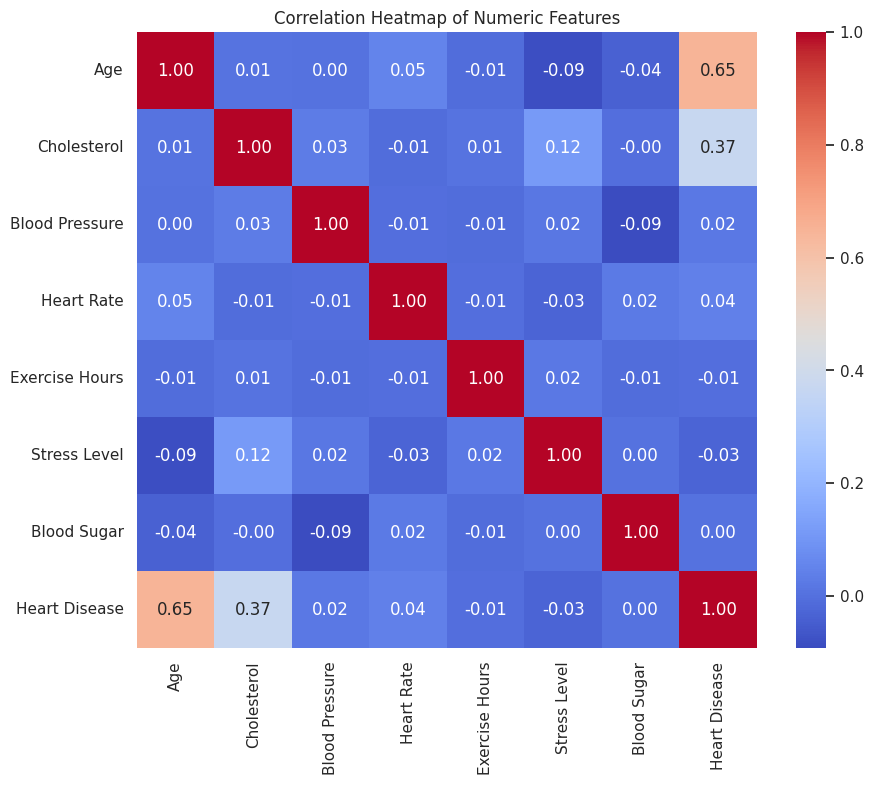

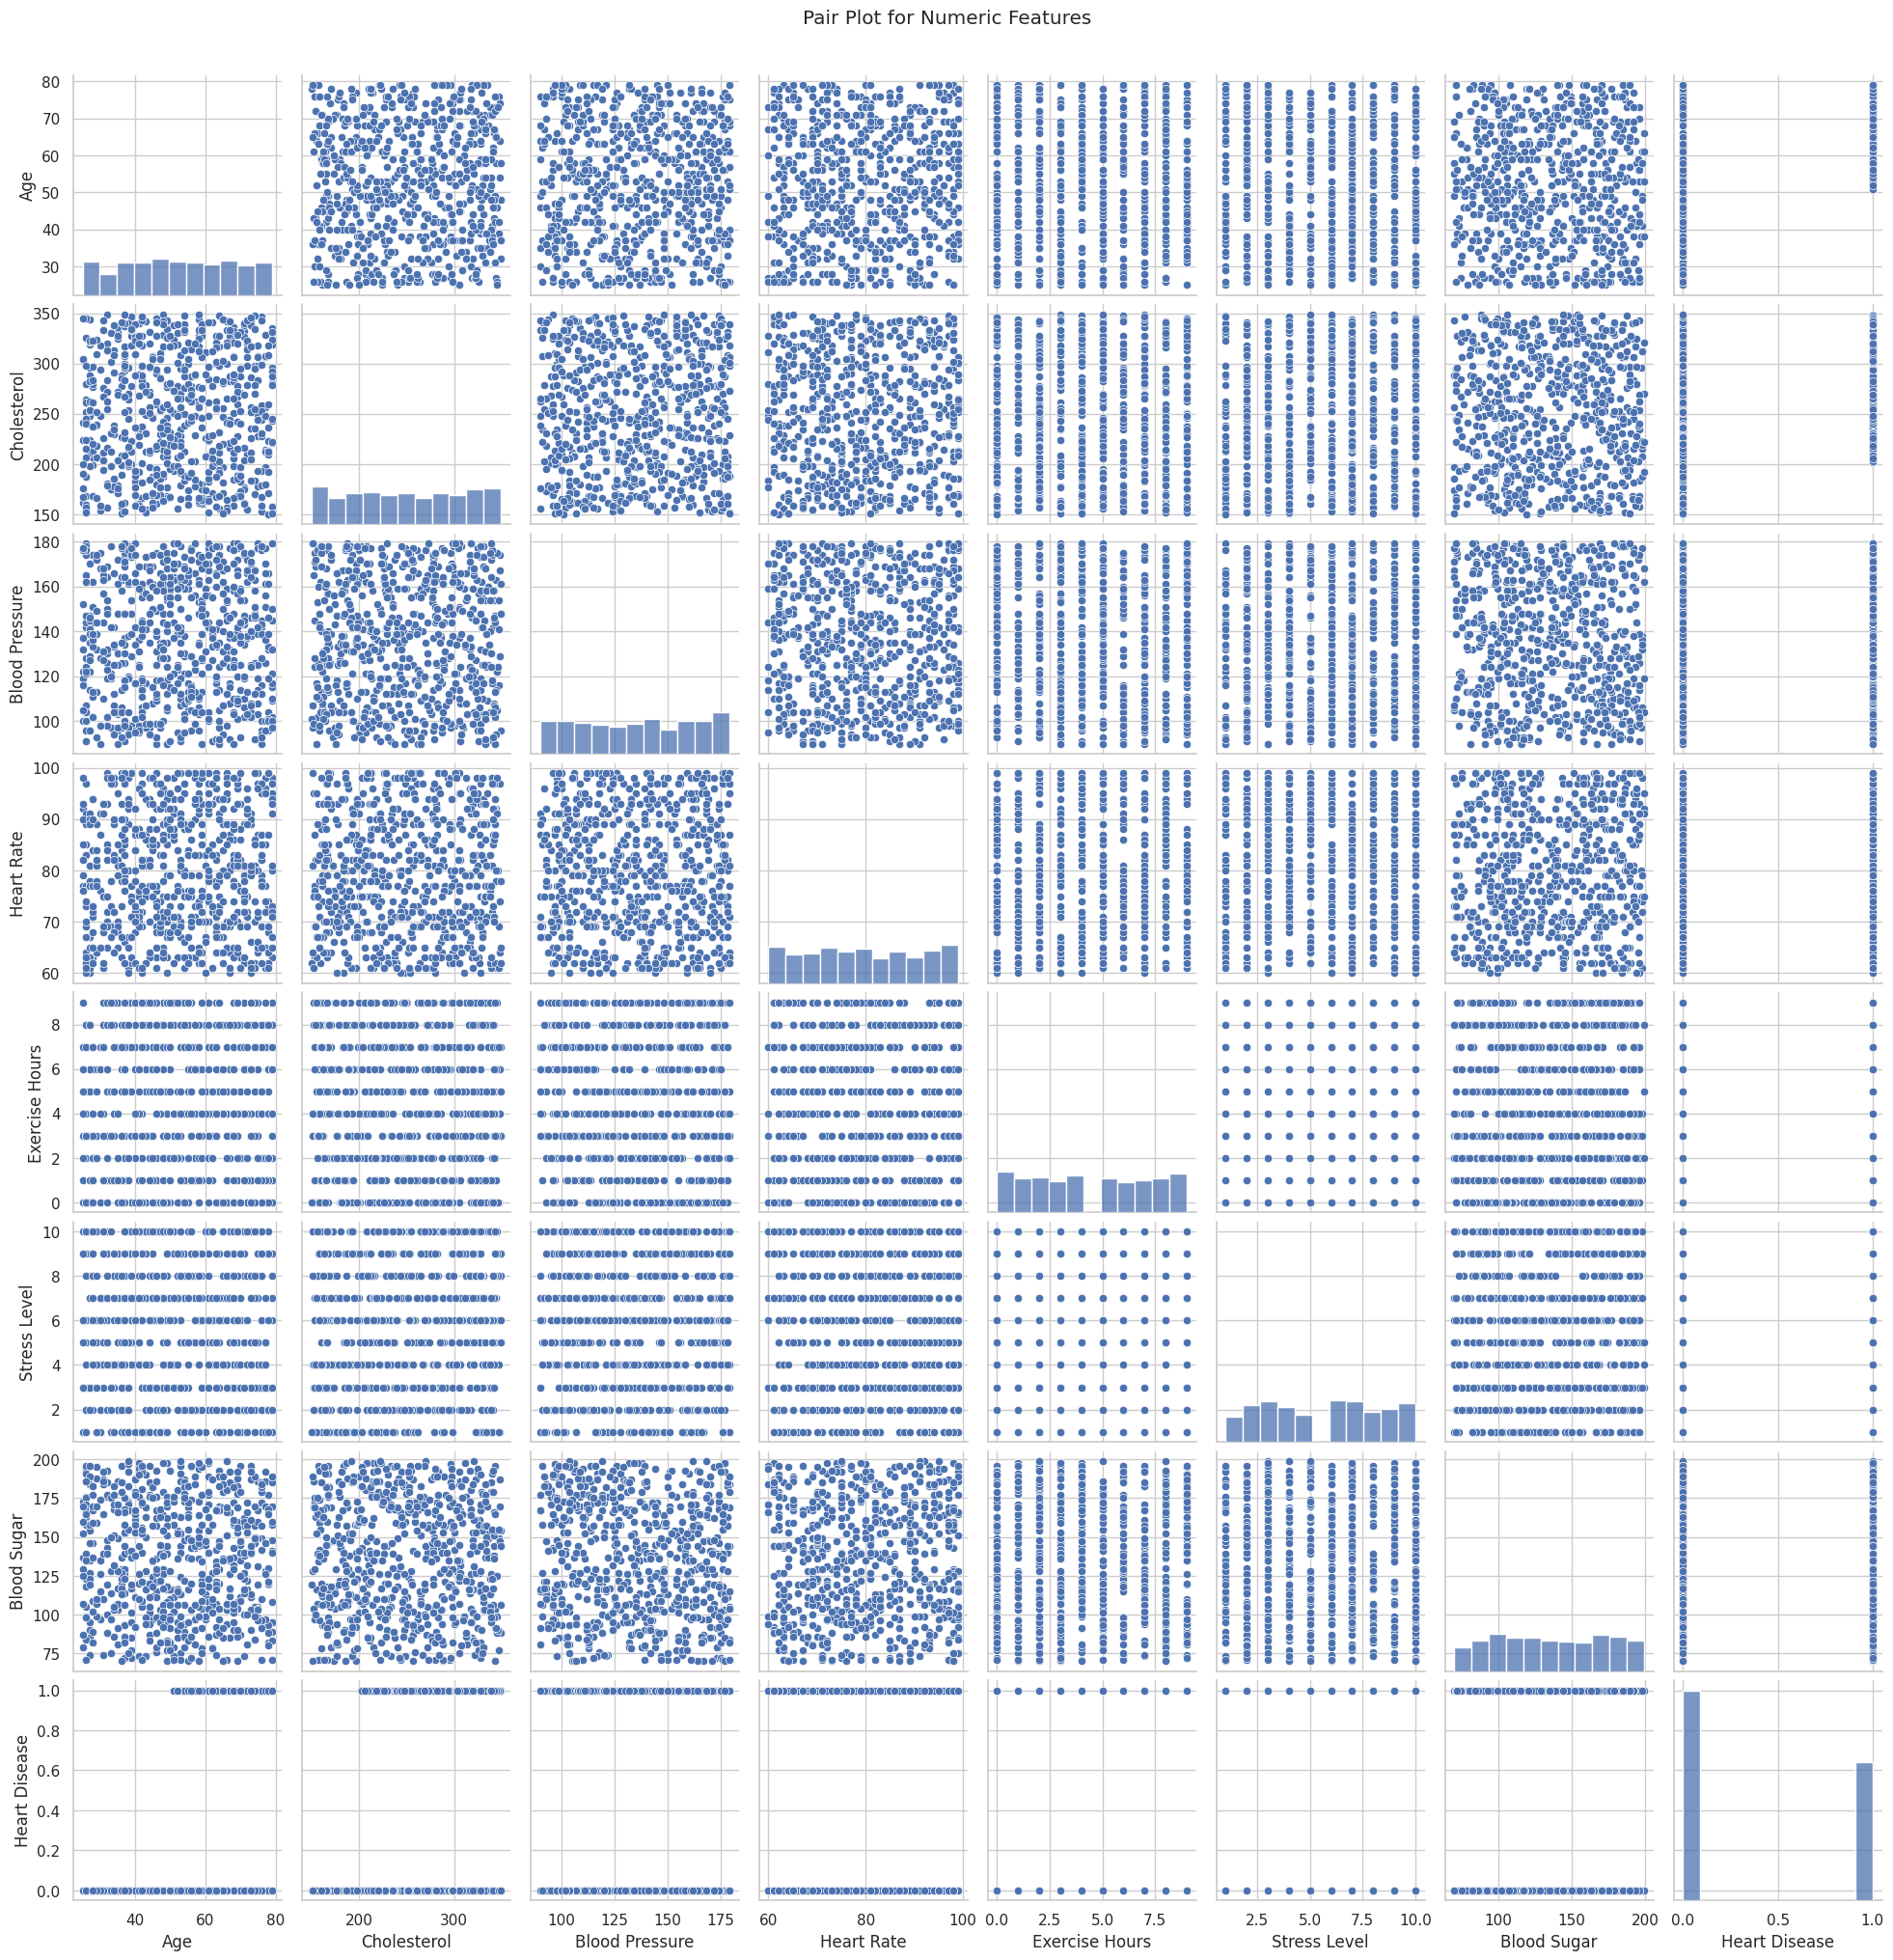

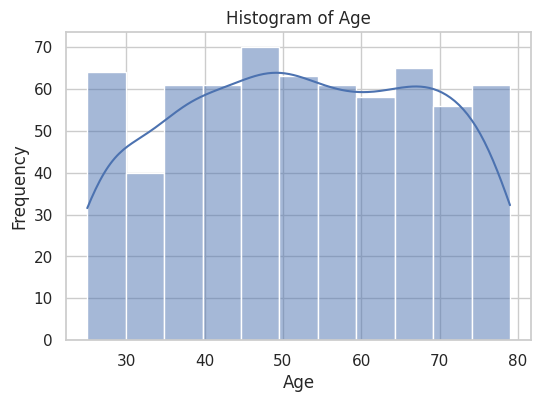

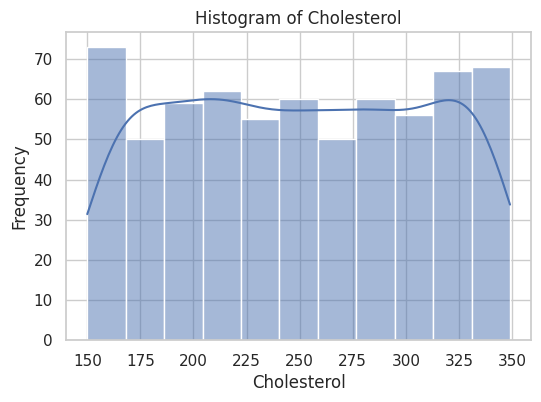

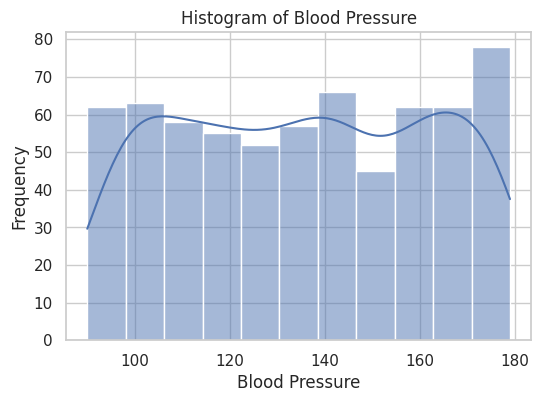

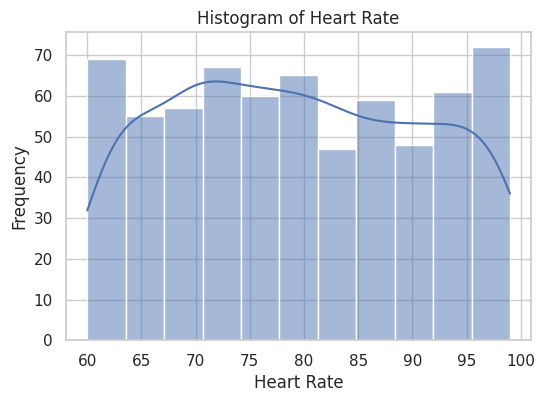

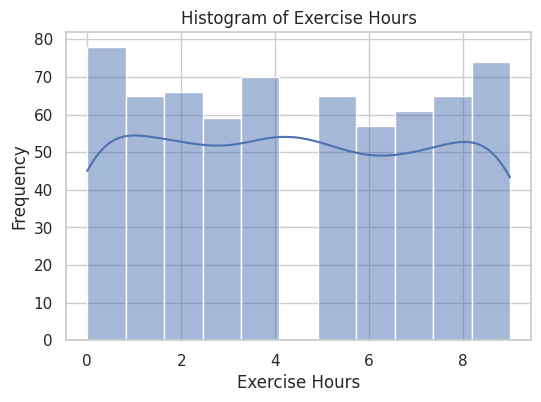

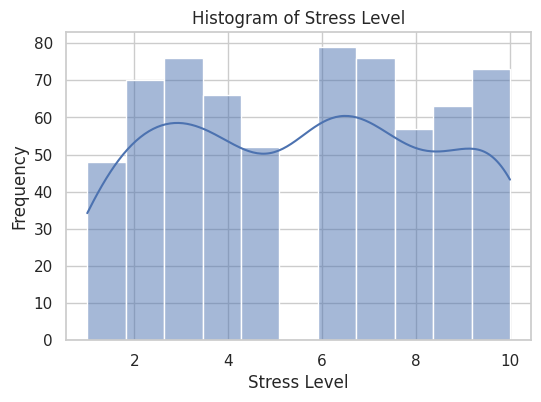

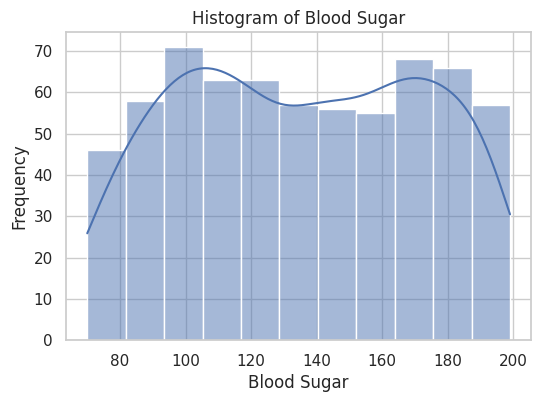

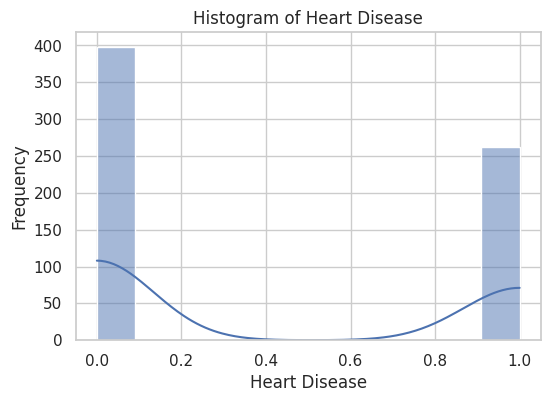

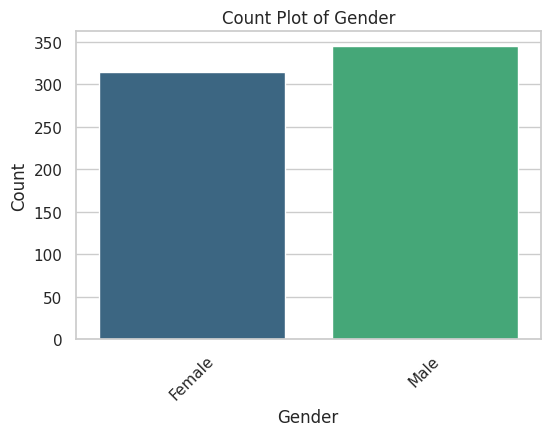

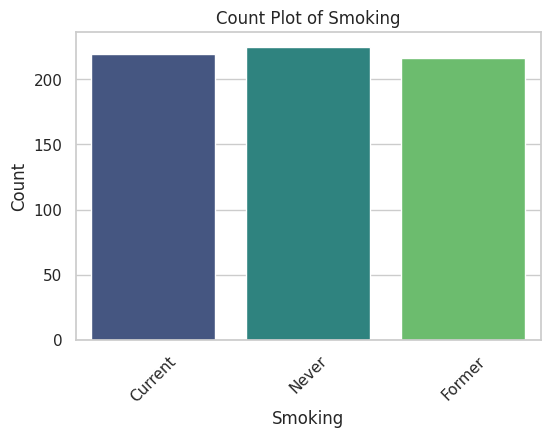

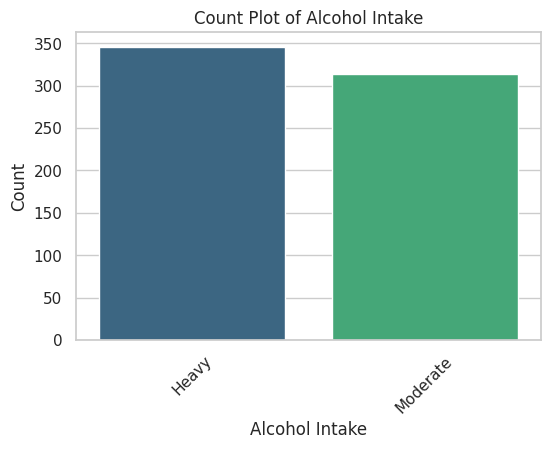

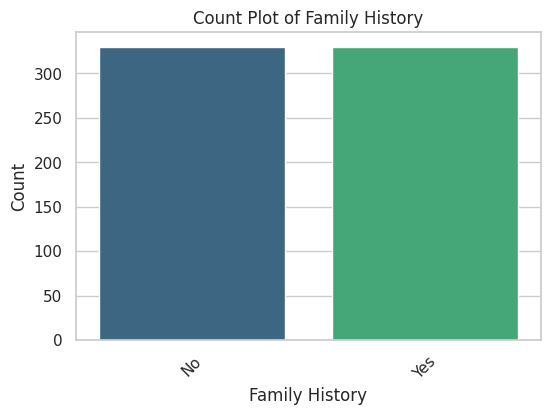

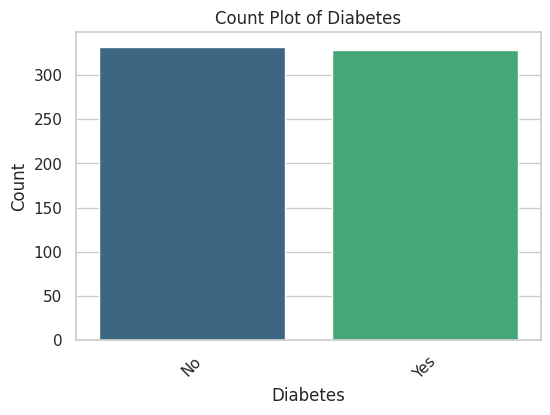

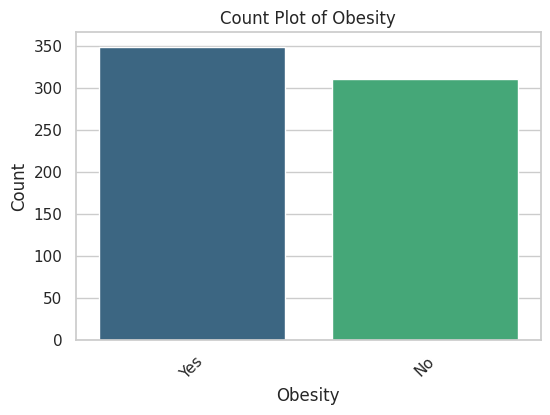

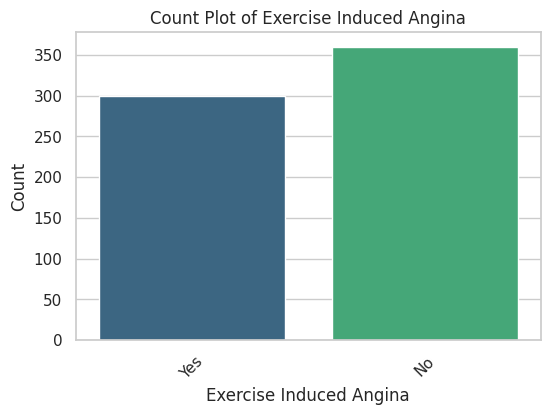

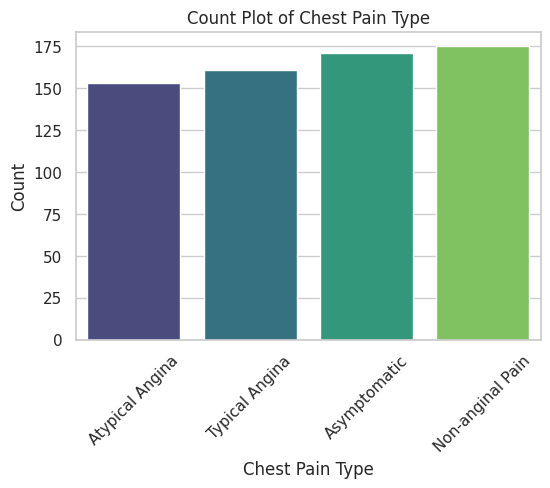

In [11]:
print('Summary statistics for numeric columns:')
display(df.describe())

#corelation heatmap for numeric variables
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

    #pair plot to examin relationships and distributions
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot for Numeric Features', y=1.02)
plt.show()


#Histogram
numeric_columns = numeric_df.columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#count plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Predictive modelling

Categorical columns to be encoded: ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']
Prediction Accuracy: 1.0000


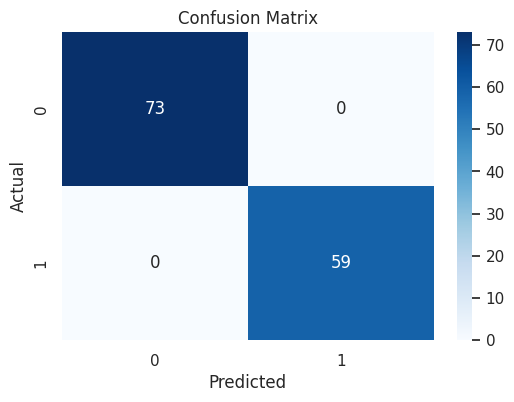

In [20]:
df_model = df.dropna(subset=['Heart Disease']).copy()


X = df_model.drop('Heart Disease', axis=1)
y = df_model['Heart Disease']

if X.isnull().sum().sum() > 0:
    print('Warning: Found missing values in features. Consider imputing or further cleaning.')


categorical_cols = X.select_dtypes(include=['object']).columns
print('Categorical columns to be encoded:', list(categorical_cols))

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Spliting  the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training  the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




